**ORIE 4740 Final Project <br />
Brian Bao // Peter Li** 

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_json('nba.json').transpose()
data.head()

,name,salary_by_year_end,stats_by_year_end,year_ends_played
a.c. green,a.c. green,"{u'1991': u'1750000', u'1993': u'1750000', u'1...","{u'1991': {u'three_p': 0.2, u'ast': 71, u'stl'...","[1991, 1992, 1993, 1994, 1995, 1996, 1997, 199..."
aaron brooks,aaron brooks,"{u'2016': u'2000000', u'2018': u'2116955', u'2...","{u'2016': {u'three_p': 0.357, u'ast': 180, u's...","[2009, 2010, 2013, 2014, 2014, 2016, 2017, 2018]"
aaron gray,aaron gray,"{u'2016': u'452059', u'2018': u'452059', u'201...","{u'2014': {u'three_p': 0.0, u'ast': 19, u'stl'...","[2008, 2009, 2010, 2011, 2012, 2013, 2014, 201..."
aaron mckie,aaron mckie,"{u'1995': u'650000', u'1997': u'1040000', u'19...","{u'1995': {u'three_p': 0.393, u'ast': 89, u'st...","[1995, 1996, 1997, 1998, 1999, 2000, 2002, 200..."
aaron williams,aaron williams,"{u'1995': u'150000', u'1997': u'169000', u'199...","{u'1995': {u'three_p': 0.0, u'ast': 0, u'stl':...","[1995, 1997, 1998, 1999, 2000, 2001, 2002, 200..."


In [3]:
# sns.countplot(x='rating_category', data=data).set_title("Chocolate")

# sns.countplot(x='quality_category', data=data).set_title("White Wine")
# plt.figure(figsize=[3,3])
# sns.barplot(x = 'quality_category', y = 'sulphates', data = data).set_title("White Wine")
# sns.barplot(x = 'quality_category', y = 'pH', data = data).set_title("White Wine")

# plt.figure(figsize=(15,7))
# plt.xticks(rotation=45)
# sns.countplot(x='cocoa_pct', data=data)

# fig, ax = plt.subplots(figsize=[13,4])
# for i, c in data.groupby('is_domestic'):
#     sns.distplot(c['rating_category'], ax=ax, label=['Not Domestic', 'Is Domestic'][i])

# ax.set_title('Categorized Rating, Domesticity')
# ax.legend()
# plt.xlabel("Categorized Rating")
# plt.ylabel("Count")

In [4]:
def data_sort(x, y):
    idx = x.argsort()
    return x[idx], y[idx]

In [45]:
def plot_results(y_preds, yTe):
    fig, ax = plt.subplots(figsize=(10, 5))
    yTe, y_preds = data_sort(yTe, y_preds)
    ax.plot(yTe, 'blue')
    ax.plot(y_preds, 'r.')
    ax.autoscale_view()
    ax.grid = True

def predict(model, sample_size, xTr, yTr, xTe, yTe):
    '''
        params:
        - model: model to fit
        - sample_size: number of samples to size
        - xTr: training features
        - yTr: training labels
        - xTe: testing features
        - yTe: testing labels
    '''
    print("Training {} on {} samples".format(model.__class__.__name__, sample_size))
    results = {}
    
    start = time.time()
    model = model.fit(xTr[:sample_size], yTr[:sample_size])
    end = time.time()

    results['train_time'] = end - start
    
    start = time.time()
    train_preds = model.predict(xTr[:300])
    test_preds = model.predict(xTe)
    end = time.time()
    
    results['prediction_time'] = end - start
    
    # Score by accuracy 1(pred_i != yTe_i)
    results['acc_train'] = accuracy_score(yTr[:300], train_preds)
    results['acc_test'] = accuracy_score(yTe, test_preds)

    # Score by fbeta 
    results['f_train'] = fbeta_score(yTr[:300], train_preds, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(yTe, test_preds, beta=0.5, average='micro')
    print(classification_report(yTe, test_preds))

    if model.__class__.__name__ == "RandomForestClassifier":
        try:
            importances = model.feature_importances_

            std = np.std([tree.feature_importances_ for tree in model.estimators_],
                         axis=0)
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(10,5))
            plt.title("Chocolate Importance of Features")
            plt.bar(range(xTr.shape[1])[:20], importances[indices][:20],
                   color="brown", yerr=std[indices][:20], align="center")
            plt.xticks(indices[:20], xTr.columns[:20], rotation=45)
            plt.ylabel("Weights")
            plt.show()
        except:
            pass
    
    return results

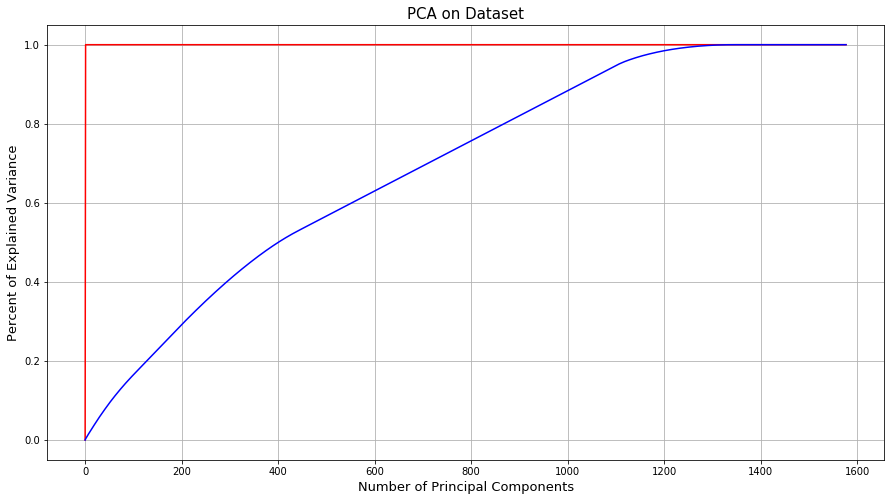

In [46]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit_transform(x)

x_normalized = (x - x.mean())/x.std()
pca_normalized = decomposition.PCA()
pca_normalized.fit_transform(x_normalized)

plt.figure(figsize=(15,8))
plt.plot(np.cumsum([0] + list(pca.explained_variance_ratio_)), 'r')
plt.plot(np.cumsum([0] + list(pca_normalized.explained_variance_ratio_)), 'b')
plt.title("PCA on Dataset", fontsize=15)
plt.xlabel("Number of Principal Components", fontsize=13)
plt.ylabel("Percent of Explained Variance",fontsize=13)
plt.grid()

Training RandomForestClassifier on 1256 samples
             precision    recall  f1-score   support

          0       0.35      0.26      0.30       135
          1       0.37      0.44      0.40       187
          2       0.56      0.56      0.56       217

avg / total       0.44      0.44      0.44       539



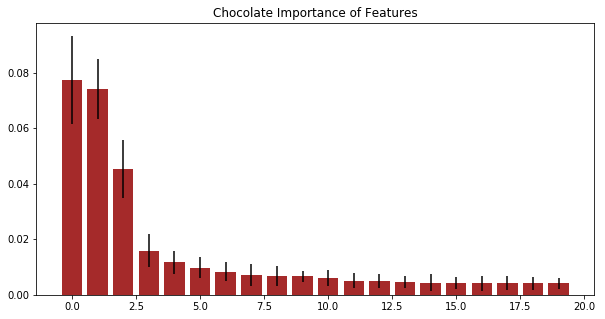

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

def run_classifiers(xTr, xTe, yTr, yTe):
    dummy = DummyClassifier(strategy='most_frequent')
    rf = RandomForestClassifier()
    opt_rf = RandomForestClassifier(n_estimators=100, random_state=20)
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    opt_knn = KNeighborsClassifier(n_neighbors=5)
    dt = DecisionTreeClassifier(max_depth=1)
    sgd = SGDClassifier()
    lr = LogisticRegression()
    svc = SVC()
    opt_svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf')

#     classifiers = [dummy, nb, knn, opt_knn, dt, svc, opt_svc, rf, opt_rf]
    classifiers = [rf]
    # Sample 1%, 10%, 25%, 50%, and 100% of the training set
    sample_pcts = [100]
    sample_sizes = [int(len(xTr)*pct/100) for pct in sample_pcts]

    results = {}
    for classifier in classifiers:
        classifier_name = classifier.__class__.__name__
        results[classifier_name] = {}
        for sample_size in sample_sizes:
            results[classifier_name][sample_size] = predict(classifier, sample_size, xTr, yTr, xTe, yTe)
    
xTr, xTe, yTr, yTe = train_test_split(x, y, test_size=0.3, random_state=1)

sc = StandardScaler()
xTr = sc.fit_transform(xTr)
xTe = sc.transform(xTe)

run_classifiers(xTr, xTe, yTr, yTe)

Training RandomForestClassifier on 1256 samples
             precision    recall  f1-score   support

          0       0.33      0.31      0.32       135
          1       0.39      0.44      0.42       187
          2       0.47      0.44      0.45       217

avg / total       0.41      0.41      0.41       539



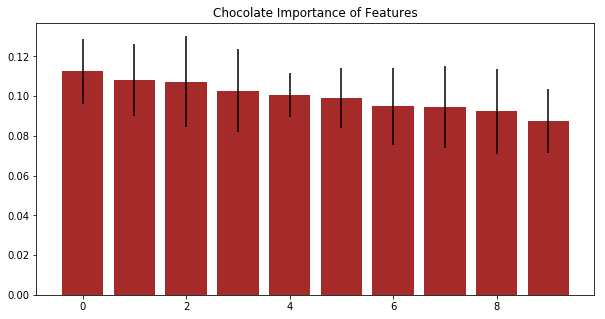

In [48]:
from sklearn import decomposition

# Run PCA
pca = decomposition.PCA(n_components=10)

xTr, xTe, yTr, yTe = train_test_split(x, y, test_size=0.3, random_state=1)

sc = StandardScaler()
xTr = sc.fit_transform(xTr)
xTe = sc.transform(xTe)

xTr_pca = pca.fit_transform(xTr)
xTe_pca = pca.transform(xTe)

run_classifiers(xTr_pca, xTe_pca, yTr, yTe)

In [23]:
# Improve on SVM
from sklearn.svm import SVC

params = {
    'C': [0.1, 0.5, 1, 1.5, 2],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 0.8, 1, 1.25, 2]
}

# White Wine: {'kernel': 'rbf', 'C': 2, 'gamma': 0.6}
# Red Wine: {'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_svc.fit(xTr, yTr)
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
# Improve on KNN
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': list(range(1, 10))
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_knn.fit(xTr, yTr)
grid_knn.best_params_

{'n_neighbors': 5}

In [25]:
# Improve on Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

params = {
    'n_estimators': [100, 200, 300, 500],
    'random_state': [5, 10, 15, 20, 30]
}

scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

# White Wine: {'n_estimators': 300, 'random_state': 15}
# Red Wine: {'n_estimators': 200, 'random_state': 20}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=params, scoring=scorer, cv=5, n_jobs=-1)
grid_rf.fit(xTr, yTr)
grid_rf.best_params_

{'n_estimators': 100, 'random_state': 20}